/tmp/ipython-input-2059009919.py:17: DtypeWarning: Columns (0,1,5,9,10,11,14,15,16,17,18,19,20,21,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, names=column_names)


Sample data:


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,employment_status,urban_rural,alcohol_freq,mental_health,medication_count,BMI,Sex,Age,Outcome
person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.0,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.1,1.0,1632.61,445.1,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.9,1.0,7661.01,1538.02,128.17,0,0.0,0.0,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.5,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0



Columns: ['employment_status', 'urban_rural', 'alcohol_freq', 'mental_health', 'medication_count', 'BMI', 'Sex', 'Age', 'Outcome']

Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100001 entries, ('person_id', 'age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease') to (15796, 44, 'Female', 'South', 'Rural', 43700.0, 'Some College', 'Marr

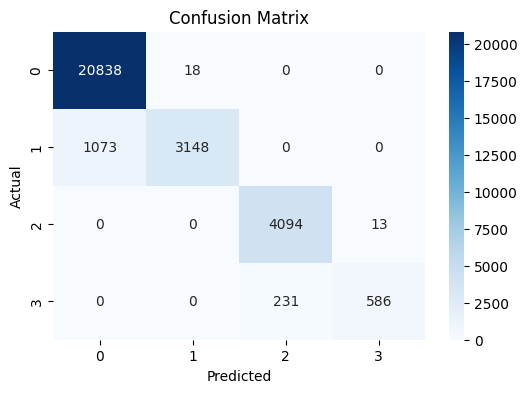

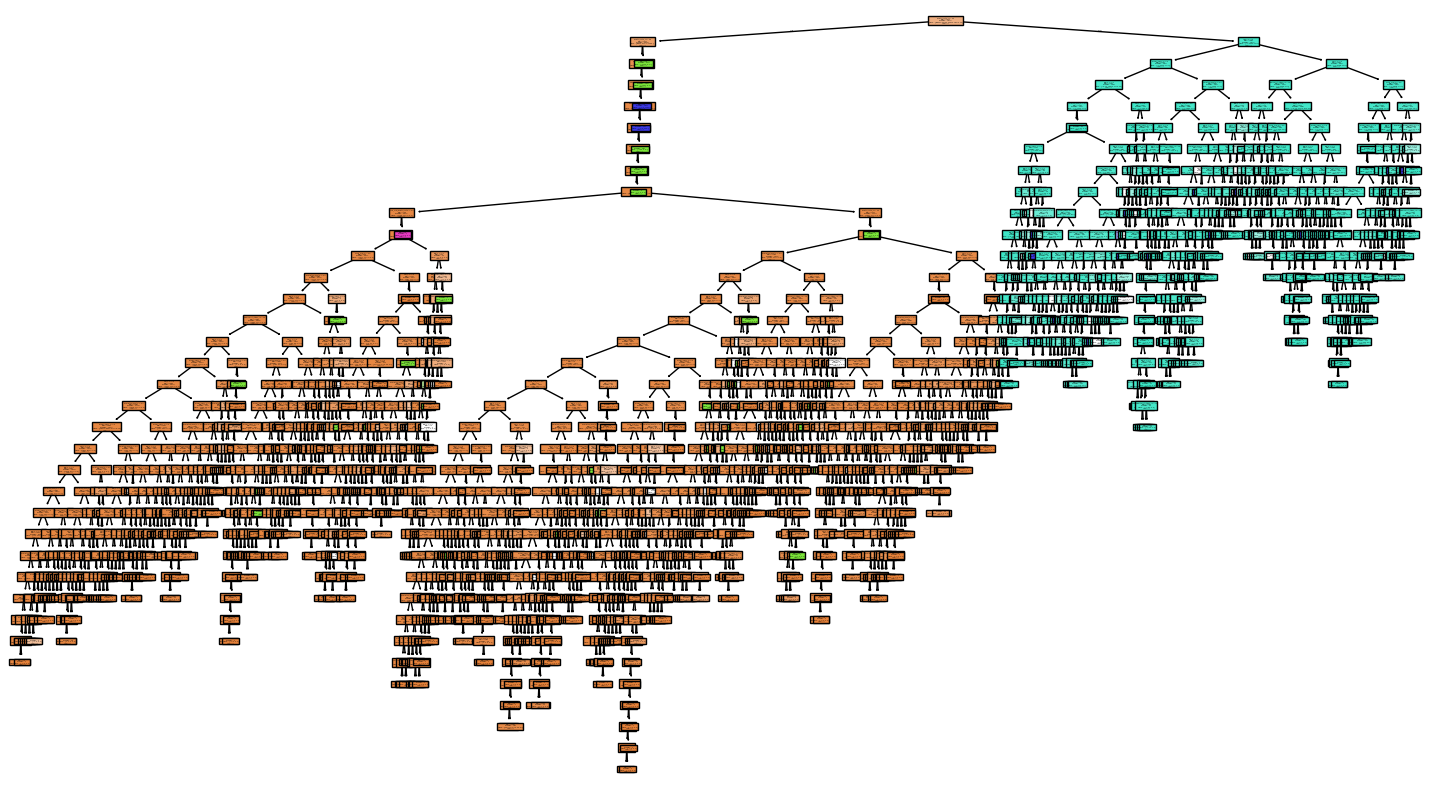

In [1]:
# Robust full pipeline: menangani error stratify pada train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://raw.githubusercontent.com/aghyaraga-hub/Radyandra-Tugas-Pertemuan-4/refs/heads/main/medical_insurance.csv"
# Jika file punya header, gunakan header=0; jika tidak, gunakan names=...
column_names = [
    'employment_status', 'urban_rural', 'alcohol_freq', 'mental_health',
    'medication_count', 'BMI', 'Sex', 'Age', 'Outcome'
]
df = pd.read_csv(url, names=column_names)

# Tampilkan beberapa baris dan info singkat
print("Sample data:")
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

# Pastikan kolom target yang benar
target_col = 'Outcome'
if target_col not in df.columns:
    print(f"[WARN] Target column '{target_col}' tidak ditemukan. Menggunakan kolom terakhir sebagai target.")
    target_col = df.columns[-1]

# 1) Inspect target distribution
print("\nDistribusi target sebelum preprocessing:")
print(df[target_col].value_counts(dropna=False))

# 2) Preprocess: isi NaN pada numerik (jika ada)
df = df.copy()
df = df.fillna(df.mean(numeric_only=True))

# 3) Pisahkan X dan y; ubah y menjadi kode numerik bila perlu
y = df[target_col].copy()
X = df.drop(columns=[target_col])

# Jika y bertipe object/categorical -> ubah menjadi kode numerik
if y.dtype == 'object' or str(y.dtype).startswith('category'):
    cat = pd.Categorical(y)
    print("\nMapping kategori target ke kode numerik:")
    mapping = {cat.categories[i]: i for i in range(len(cat.categories))}
    print(mapping)
    y = cat.codes

print("\nDistribusi target setelah encoding (kode numerik):")
vc = pd.Series(y).value_counts().sort_index()
print(vc.to_string())

# 4) One-hot encode fitur kategorikal (hanya fitur)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    print("\nKolom kategorikal akan di-encode:", cat_cols)
    X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
else:
    X_encoded = X.copy()

print("\nShape fitur setelah encoding:", X_encoded.shape)

# 5) Robust train_test_split dengan fallback jika stratify gagal
test_size = 0.3
random_state = 42

def try_train_test_split(X, y, test_size=0.3, random_state=42):
    """
    Coba stratify=y. Jika gagal karena distribusi kelas, fallback ke stratify=None.
    """
    # Jika y hanya punya 1 kelas -> stratify must be None
    unique, counts = np.unique(y, return_counts=True)
    if len(unique) == 1:
        print("\n[INFO] Target hanya memiliki 1 kelas => stratify tidak dapat digunakan. Akan membagi tanpa stratify.")
        return train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True)
    # Jika ada kelas dengan jumlah 1, stratify juga kemungkinan gagal; kita coba dan tangkap ValueError
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
        print("\n[OK] train_test_split dengan stratify berhasil.")
        return X_train, X_test, y_train, y_test
    except ValueError as e:
        print("\n[WARN] train_test_split dengan stratify gagal:", str(e))
        print("       Melakukan fallback: membagi tanpa stratify.")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=None
        )
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = try_train_test_split(X_encoded, y, test_size=test_size, random_state=random_state)

print(f"\nUkuran X_train: {X_train.shape}  X_test: {X_test.shape}")
print("Distribusi target pada y_train:")
print(pd.Series(y_train).value_counts().sort_index())
print("Distribusi target pada y_test:")
print(pd.Series(y_test).value_counts().sort_index())

# 6) Train Decision Tree
model = DecisionTreeClassifier(random_state=random_state)
model.fit(X_train, y_train)

# 7) Predict & evaluate
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8) Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(18,10))
plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=[str(c) for c in np.unique(y)])
plt.show()
